<a href="https://colab.research.google.com/github/srujanboda/Asteroid-classification-using-knn/blob/main/SAISRUJAN_BODA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------

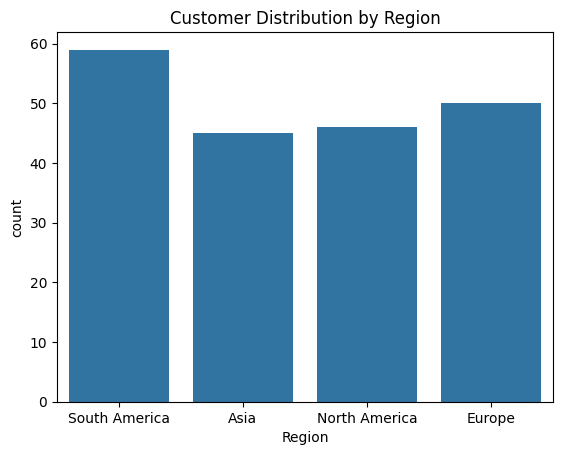

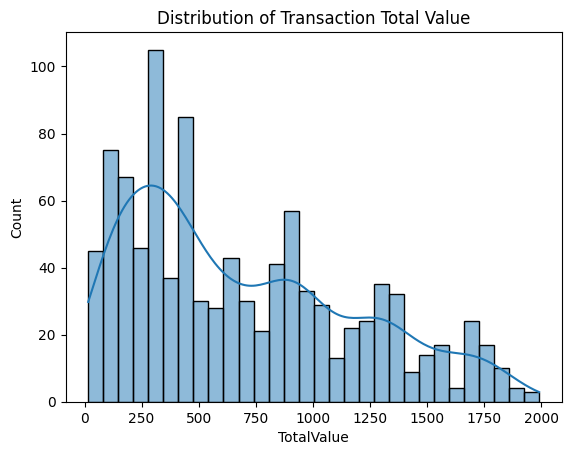

In [15]:
# Imports: pandas for data handling, matplotlib for plotting, seaborn for enhanced visuals.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading: Reads data from three CSV files into pandas DataFrames.
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Data Overview: Prints a summary of each dataset (columns, data types, etc.).
print(customers.info())
print("\n\n")
print(products.info())
print("\n\n")
print(transactions.info())
print("\n\n")

# Missing Data Check: Reports the number of missing values in each column.
print(customers.isnull().sum())
print("\n\n")
print(products.isnull().sum())
print("\n\n")
print(transactions.isnull().sum())
print("\n\n")

# Transaction Statistics: Calculates and prints descriptive statistics for transactions.
print(transactions.describe())
print("\n\n")

# Customer Distribution: Visualizes customer distribution across regions using a countplot.
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.show() #creates a bargraph

print("\n\n")

# Transaction Value Distribution: Visualizes transaction values using a histogram with KDE.
sns.histplot(data=transactions, x='TotalValue', bins=30, kde=True)
plt.title('Distribution of Transaction Total Value')
plt.show() # creates a histogram with a density curve, visualizing the distribution total transaction values

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


data = pd.merge(transactions, products, on='ProductID')
data = pd.merge(data, customers, on='CustomerID')

data['Profile'] = data['Region'] + ' ' + data['Category']
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(data['Profile'])
similarity_matrix = cosine_similarity(features)

lookalike = {}
for i, row in enumerate(similarity_matrix):
    similar_indices = row.argsort()[-4:-1]
    lookalike[data['CustomerID'].iloc[i]] = [
        (data['CustomerID'].iloc[j], row[j]) for j in similar_indices
    ]


pd.DataFrame(lookalike.items(), columns=['CustomerID', 'Recommendations']).to_csv(
    'Lookalike.csv', index=False
)


DB Index: 0.6896222986718775


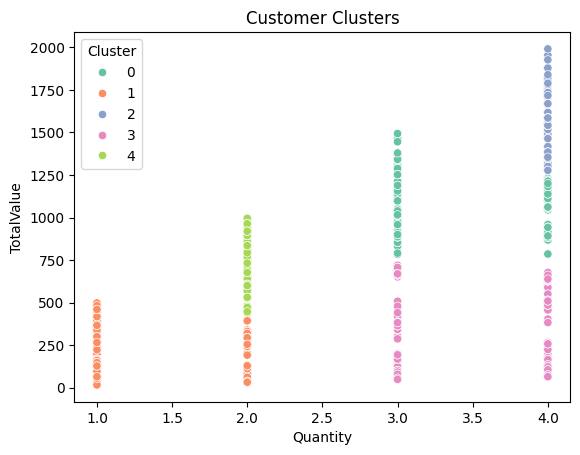

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


features = data[['Quantity', 'TotalValue']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#applying K-means
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

db_index = davies_bouldin_score(scaled_features, data['Cluster'])
print(f'DB Index: {db_index}')

sns.scatterplot(x=data['Quantity'], y=data['TotalValue'], hue=data['Cluster'], palette='Set2')
plt.title('Customer Clusters')
plt.show()
